<a href="https://colab.research.google.com/github/Ghaidahazaa/Investigating-Compounds-Targeting-nAChR-/blob/main/Developing_a_Regression_Model_for_Investigating_Compounds_Targeting_nAChR_Descriptor_Dataset_Preparation_Using_the_Random_Forest_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**1. Import libraries**

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

#**2. Load the data set**

In [ ]:
! wget https://colab.research.google.com/drive/19lVSUCz7aMWnOYXGcbuLJMQMS4KLtuq6

--2024-11-23 12:38:30--  https://colab.research.google.com/drive/19lVSUCz7aMWnOYXGcbuLJMQMS4KLtuq6
Resolving colab.research.google.com (colab.research.google.com)... 142.251.2.101, 142.251.2.113, 142.251.2.102, ...
Connecting to colab.research.google.com (colab.research.google.com)|142.251.2.101|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘19lVSUCz7aMWnOYXGcbuLJMQMS4KLtuq6’

19lVSUCz7aMWnOYXGcb     [ <=>                ]  87.82K  --.-KB/s    in 0.007s  

2024-11-23 12:38:30 (11.6 MB/s) - ‘19lVSUCz7aMWnOYXGcbuLJMQMS4KLtuq6’ saved [89924]



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp '/content/drive/My Drive/Colab Notebooks/data2/Neuronal_acetylcholine_06_bioactivity_data_3class_pIC50_pubchem_fp.csv' '/content/drive/My Drive/Colab Notebooks/data2/Copy_of_Neuronal_acetylcholine_06_bioactivity_data_3class_pIC50_pubchem_fp.csv'

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data2/Copy_of_Neuronal_acetylcholine_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

#**3. Input features**

**3.1. Input features**

In [ ]:
X = df.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
81,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
82,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
83,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


**3.2. Output features**

In [ ]:
Y = df.pIC50
Y

,pIC50
0,7.795880
1,6.173925
2,8.769551
3,8.376751
4,8.318759
...,...
80,6.000000
81,7.619789
82,6.000000
83,8.886057


#**3.3. Let's examine the data dimension**

In [ ]:
X.shape

(85, 881)

In [ ]:
Y.shape

(85,)

#**3.4. Remove low variance features**

In [ ]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(X)

In [ ]:
X.shape

(85, 163)

#**4. Data split (80/20 ratio)**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
X_train.shape, Y_train.shape

((68, 163), (68,))

In [ ]:
X_test.shape, Y_test.shape

((17, 163), (17,))

#**5. Building a Regression Model using Random Forest**

In [ ]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.12610293908518633

In [ ]:
Y_pred = model.predict(X_test)

#**6. Scatter Plot of Experimental vs Predicted pIC50 Values**

<function matplotlib.pyplot.show(close=None, block=None)>

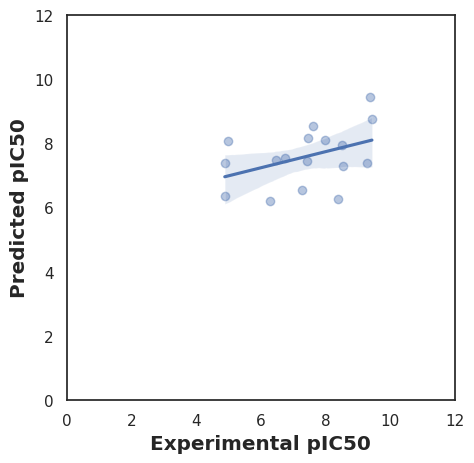

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

# Create a DataFrame with the test and predicted values
import pandas as pd  # Import pandas for DataFrame creation
data = pd.DataFrame({'Experimental pIC50': Y_test, 'Predicted pIC50': Y_pred})

# Pass the DataFrame to regplot and specify x and y columns
ax = sns.regplot(x='Experimental pIC50', y='Predicted pIC50', data=data, scatter_kws={'alpha':0.4})

ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show